***Machine Learning on Boston Housing Dataset***

In [2]:
#libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib as mpl 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error

***Descriptive Analysis***

In [7]:
col_names = ['CRIM', 'ZN', 'INDUS', 'CHAS','NOX', 'RM','AGE','DIS','RAD','TAX','PTRATIO',
             'B','LSTAT','MEDV']
df = pd.read_csv('../input/deep_Learning_for_time_series_forecasting_datasets/housing.csv', names=col_names)
df.shape

(506, 14)

In [8]:
df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

| Feature  | Description                                              |
|----------|----------------------------------------------------------|
| CRIM     | Per capita crime rate by town                           |
| ZN       | Proportion of residential land zoned for lots over 25,000 sq.ft. |
| INDUS    | Proportion of non-retail business acres per town         |
| CHAS     | Charles River dummy variable (= 1 if tract bounds river; 0 otherwise) |
| NOX      | Nitric oxides concentration (parts per 10 million)      |
| RM       | Average number of rooms per dwelling                     |
| AGE      | Proportion of owner-occupied units built prior to 1940   |
| DIS      | Weighted distances to five Boston employment centres    |
| RAD      | Index of accessibility to radial highways                |
| TAX      | Full-value property-tax rate per $10,000                |
| PTRATIO  | Pupil-teacher ratio by town                              |
| B        | 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town |
| LSTAT    | Percentage lower status of the population               |
| MEDV     | Median value of owner-occupied homes in $1000's          |


In [9]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [16]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [17]:
df.corr(method='pearson')

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


<Figure size 800x600 with 0 Axes>

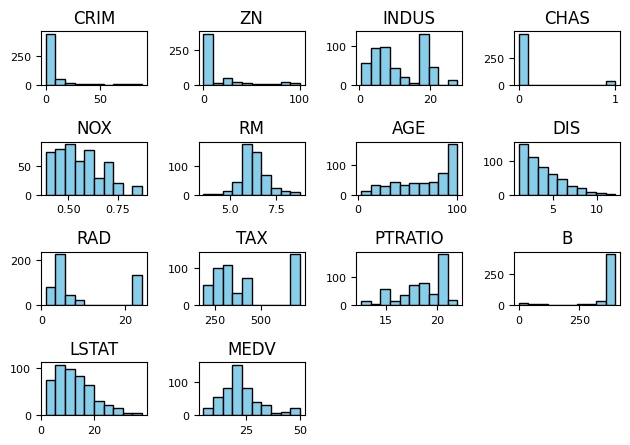

In [24]:
plt.figure(figsize=(8, 6))
df.hist(sharex=False, sharey=False, xlabelsize=8, ylabelsize=8, grid=False, color='skyblue', edgecolor='black')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

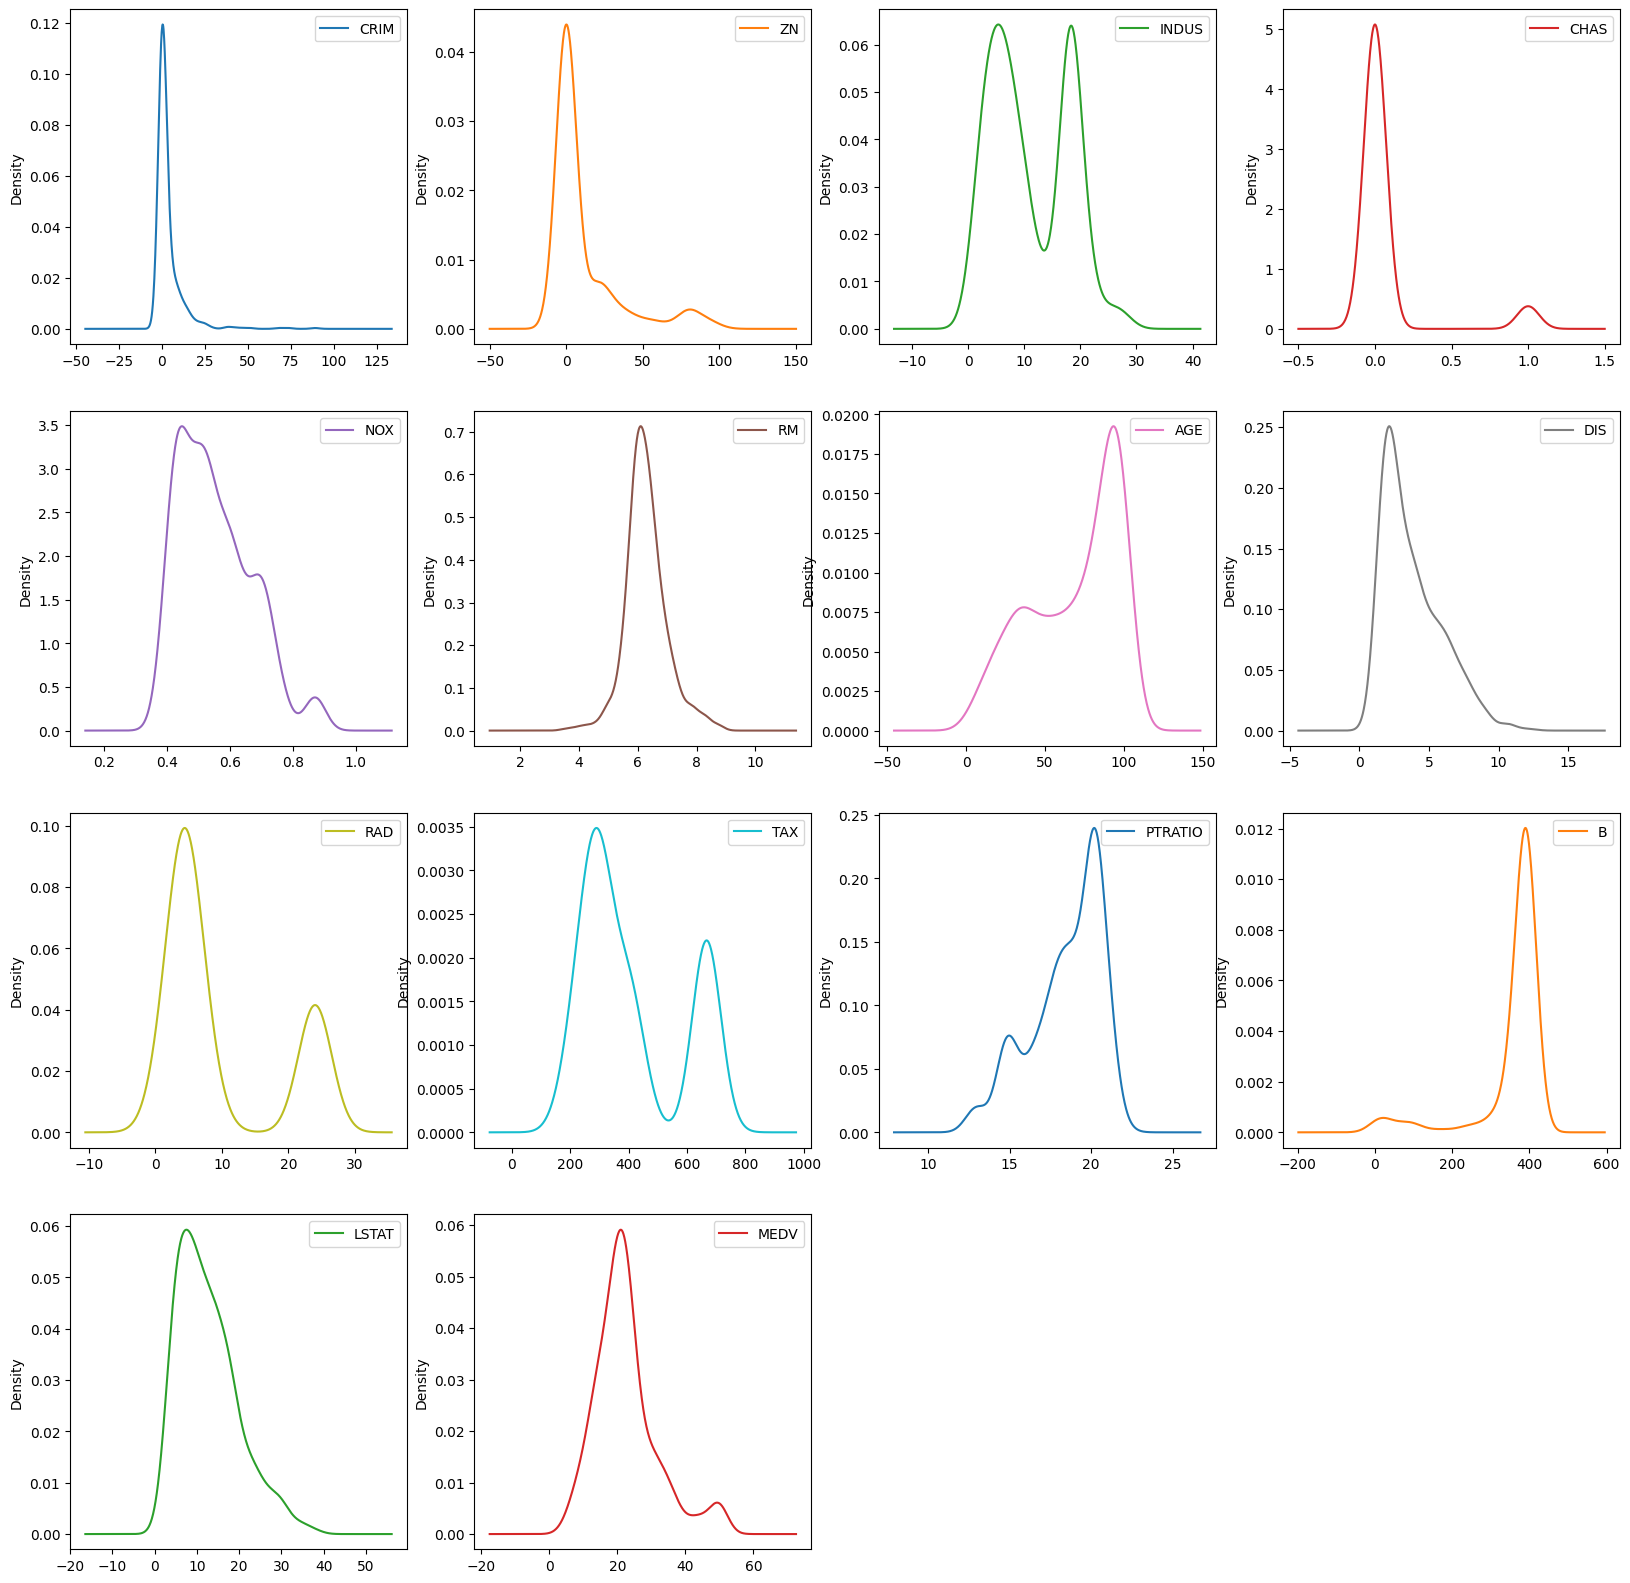

In [43]:
df.plot(kind='density', subplots=True, layout=(4,4), sharex=False, fontsize=10, figsize=(20,20))
plt.show()

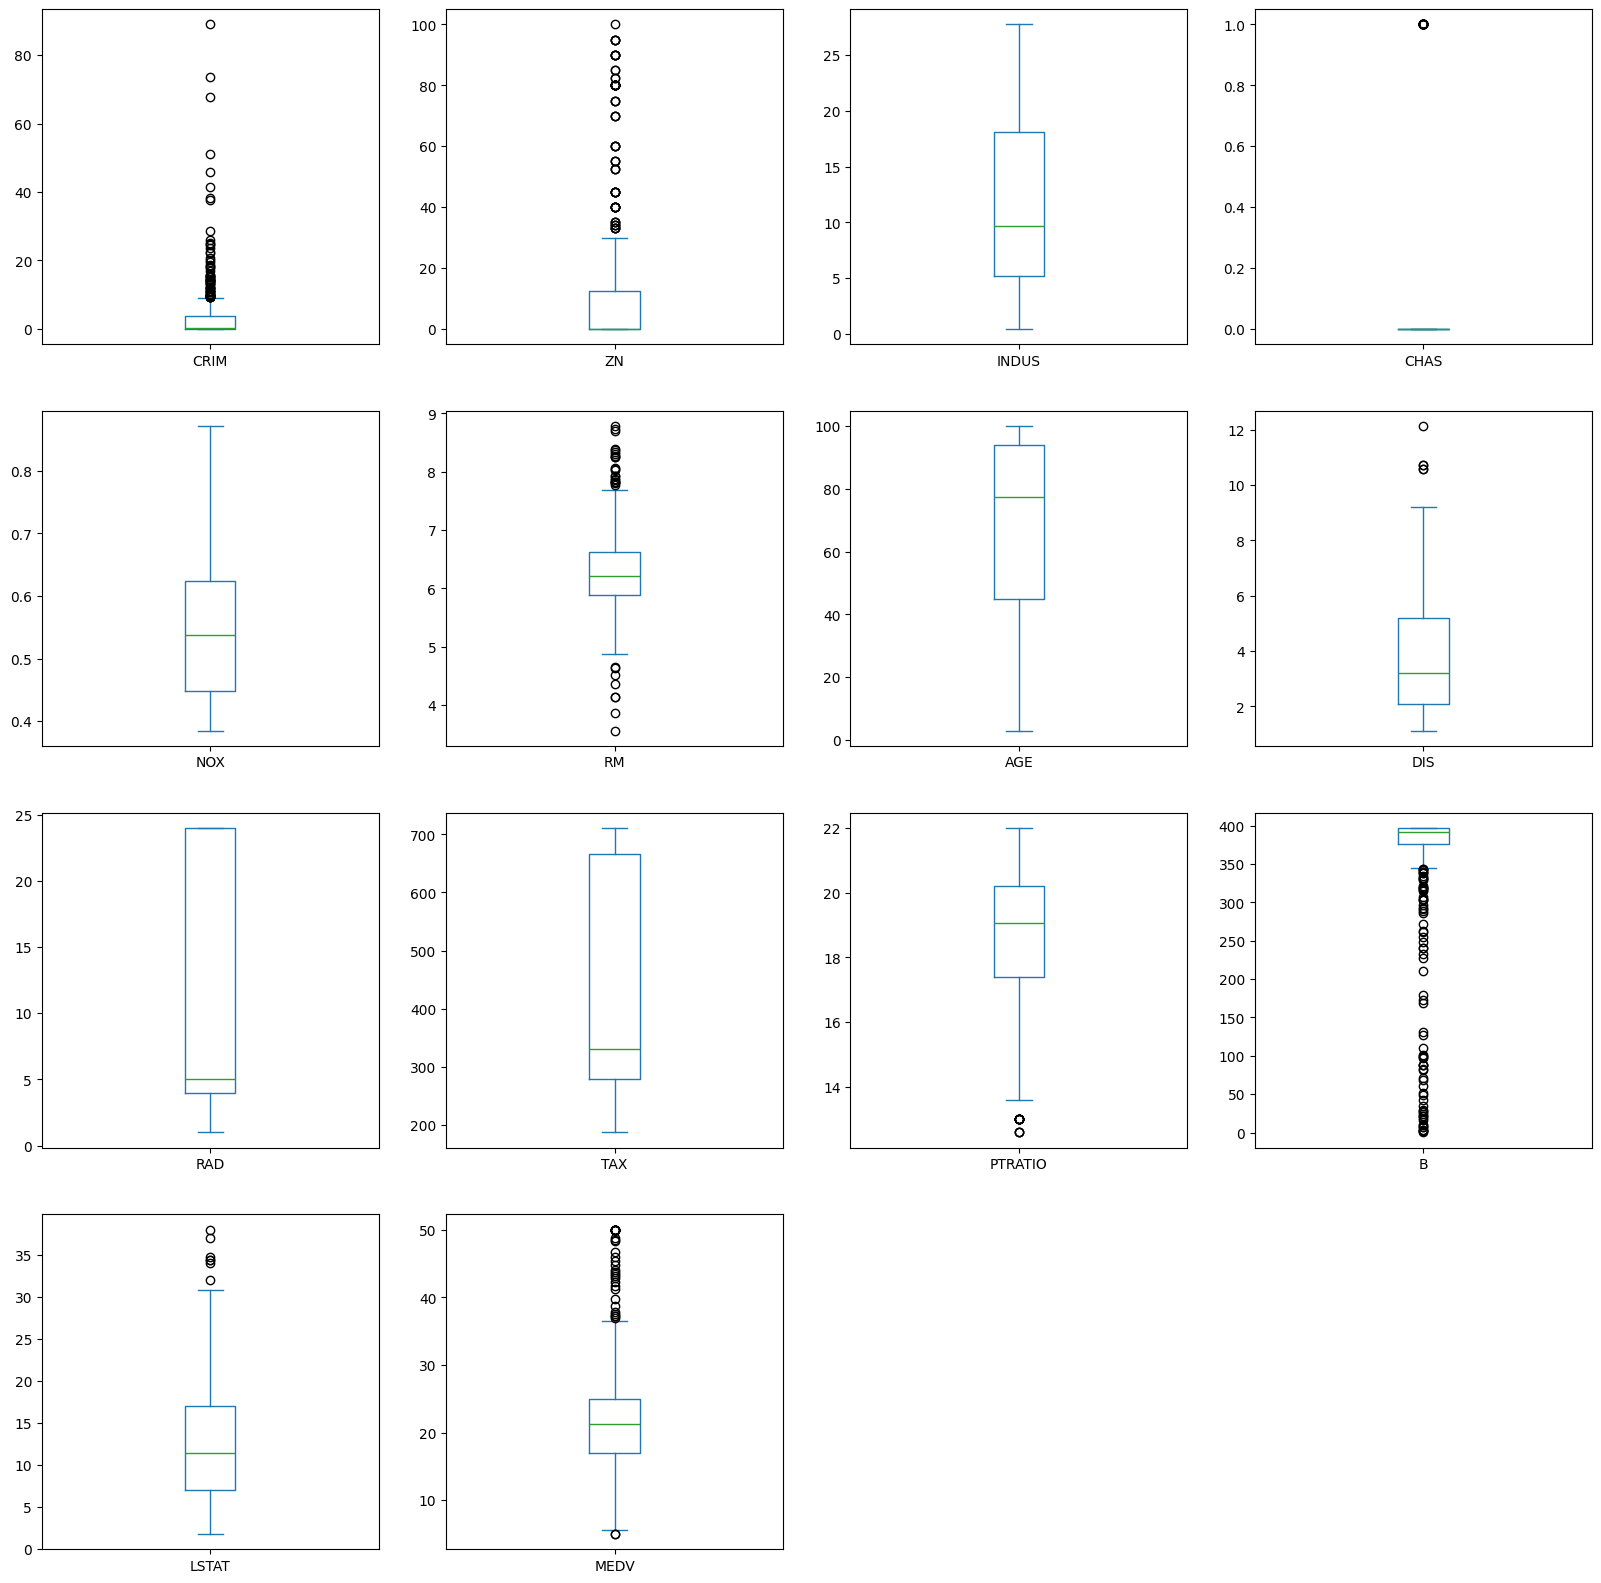

In [45]:
df.plot(kind='box', subplots=True, layout=(4,4), figsize=(20,20))
plt.show()

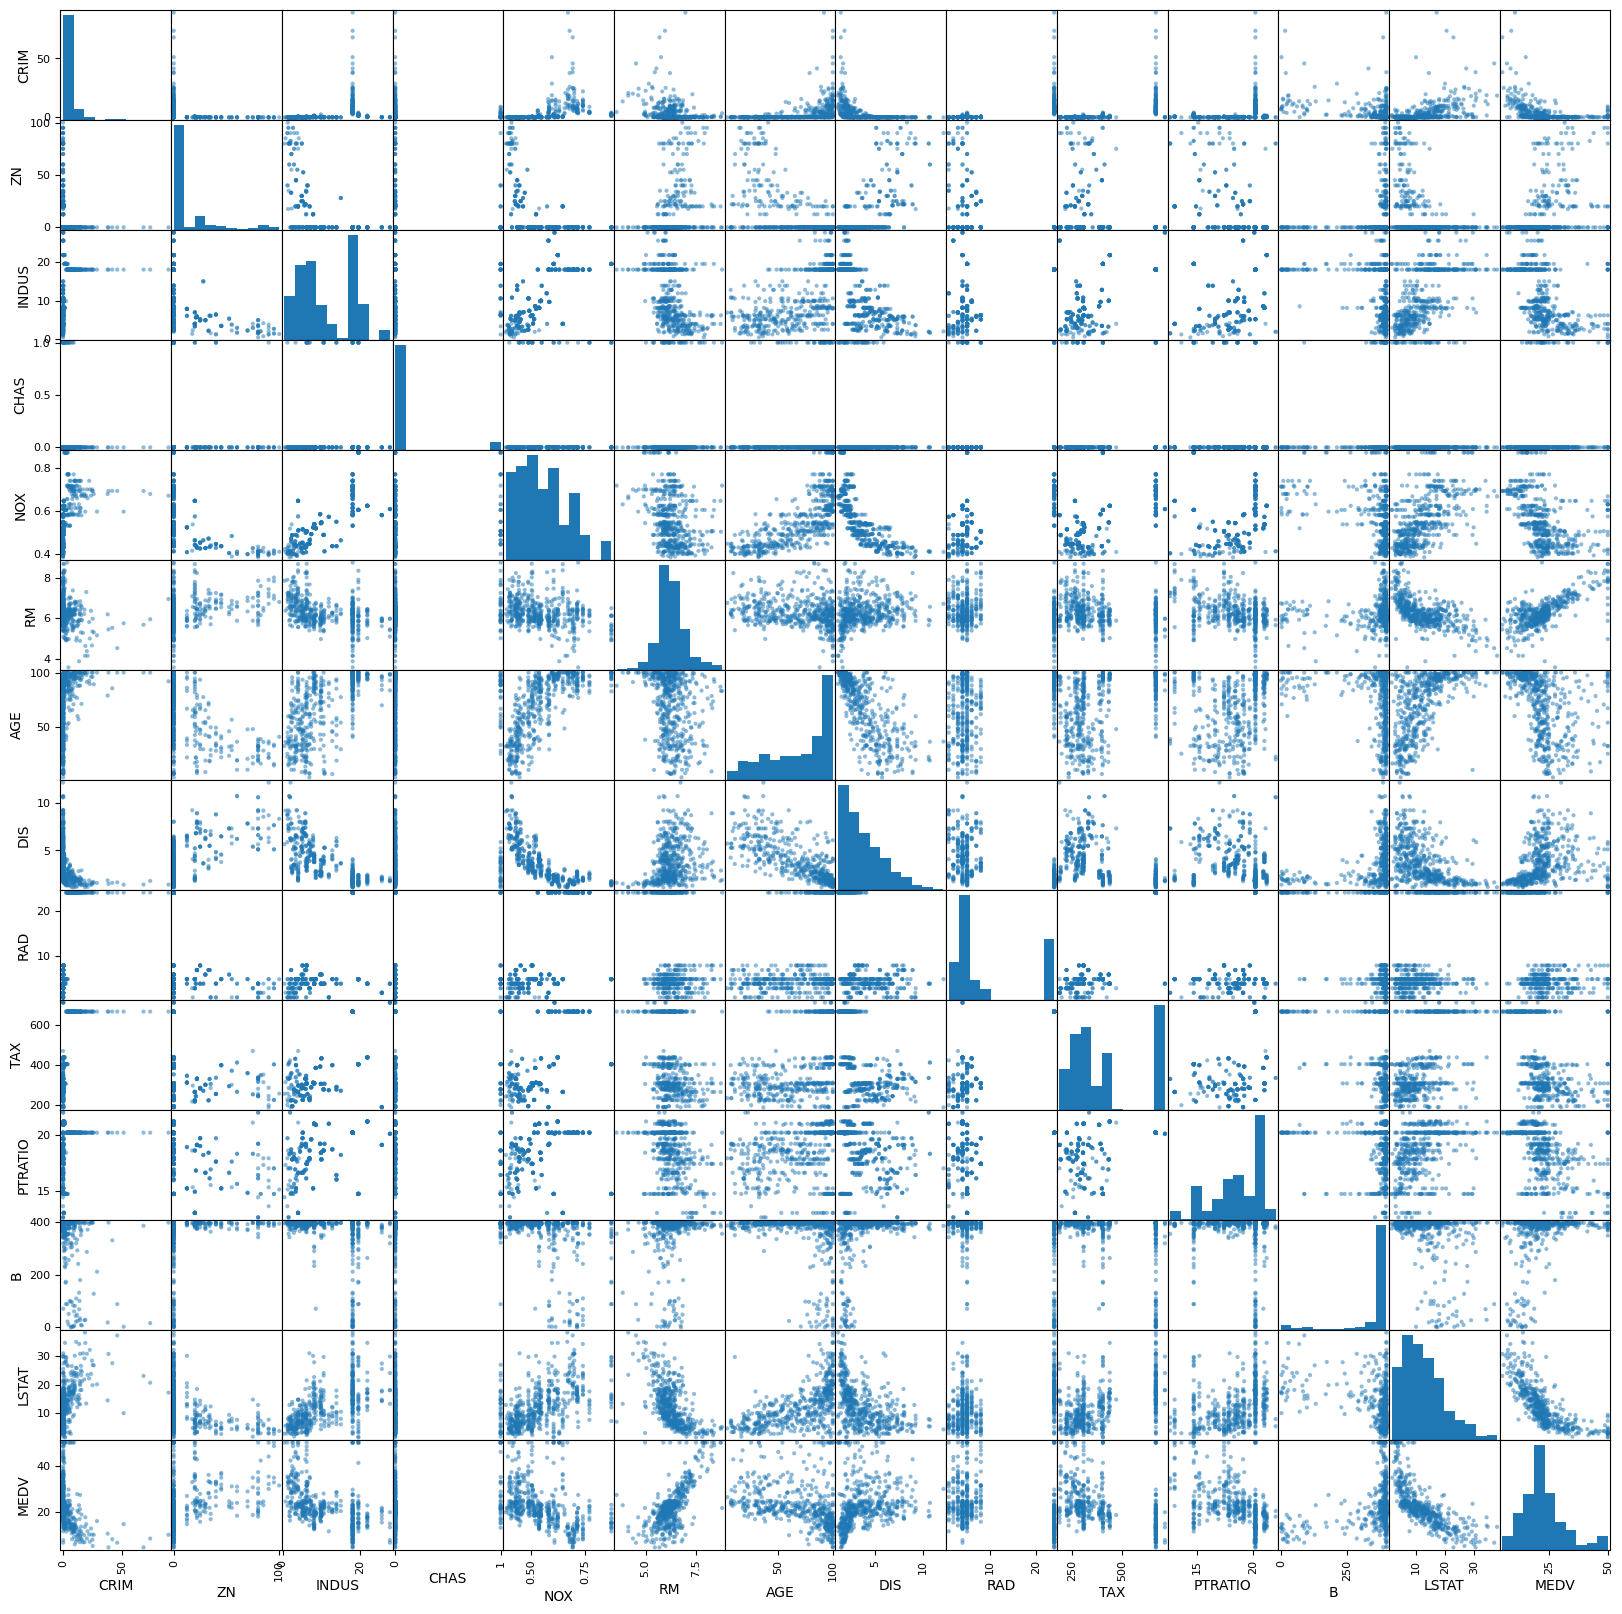

In [38]:
pd.plotting.scatter_matrix(df, figsize=(20,20))
plt.show()

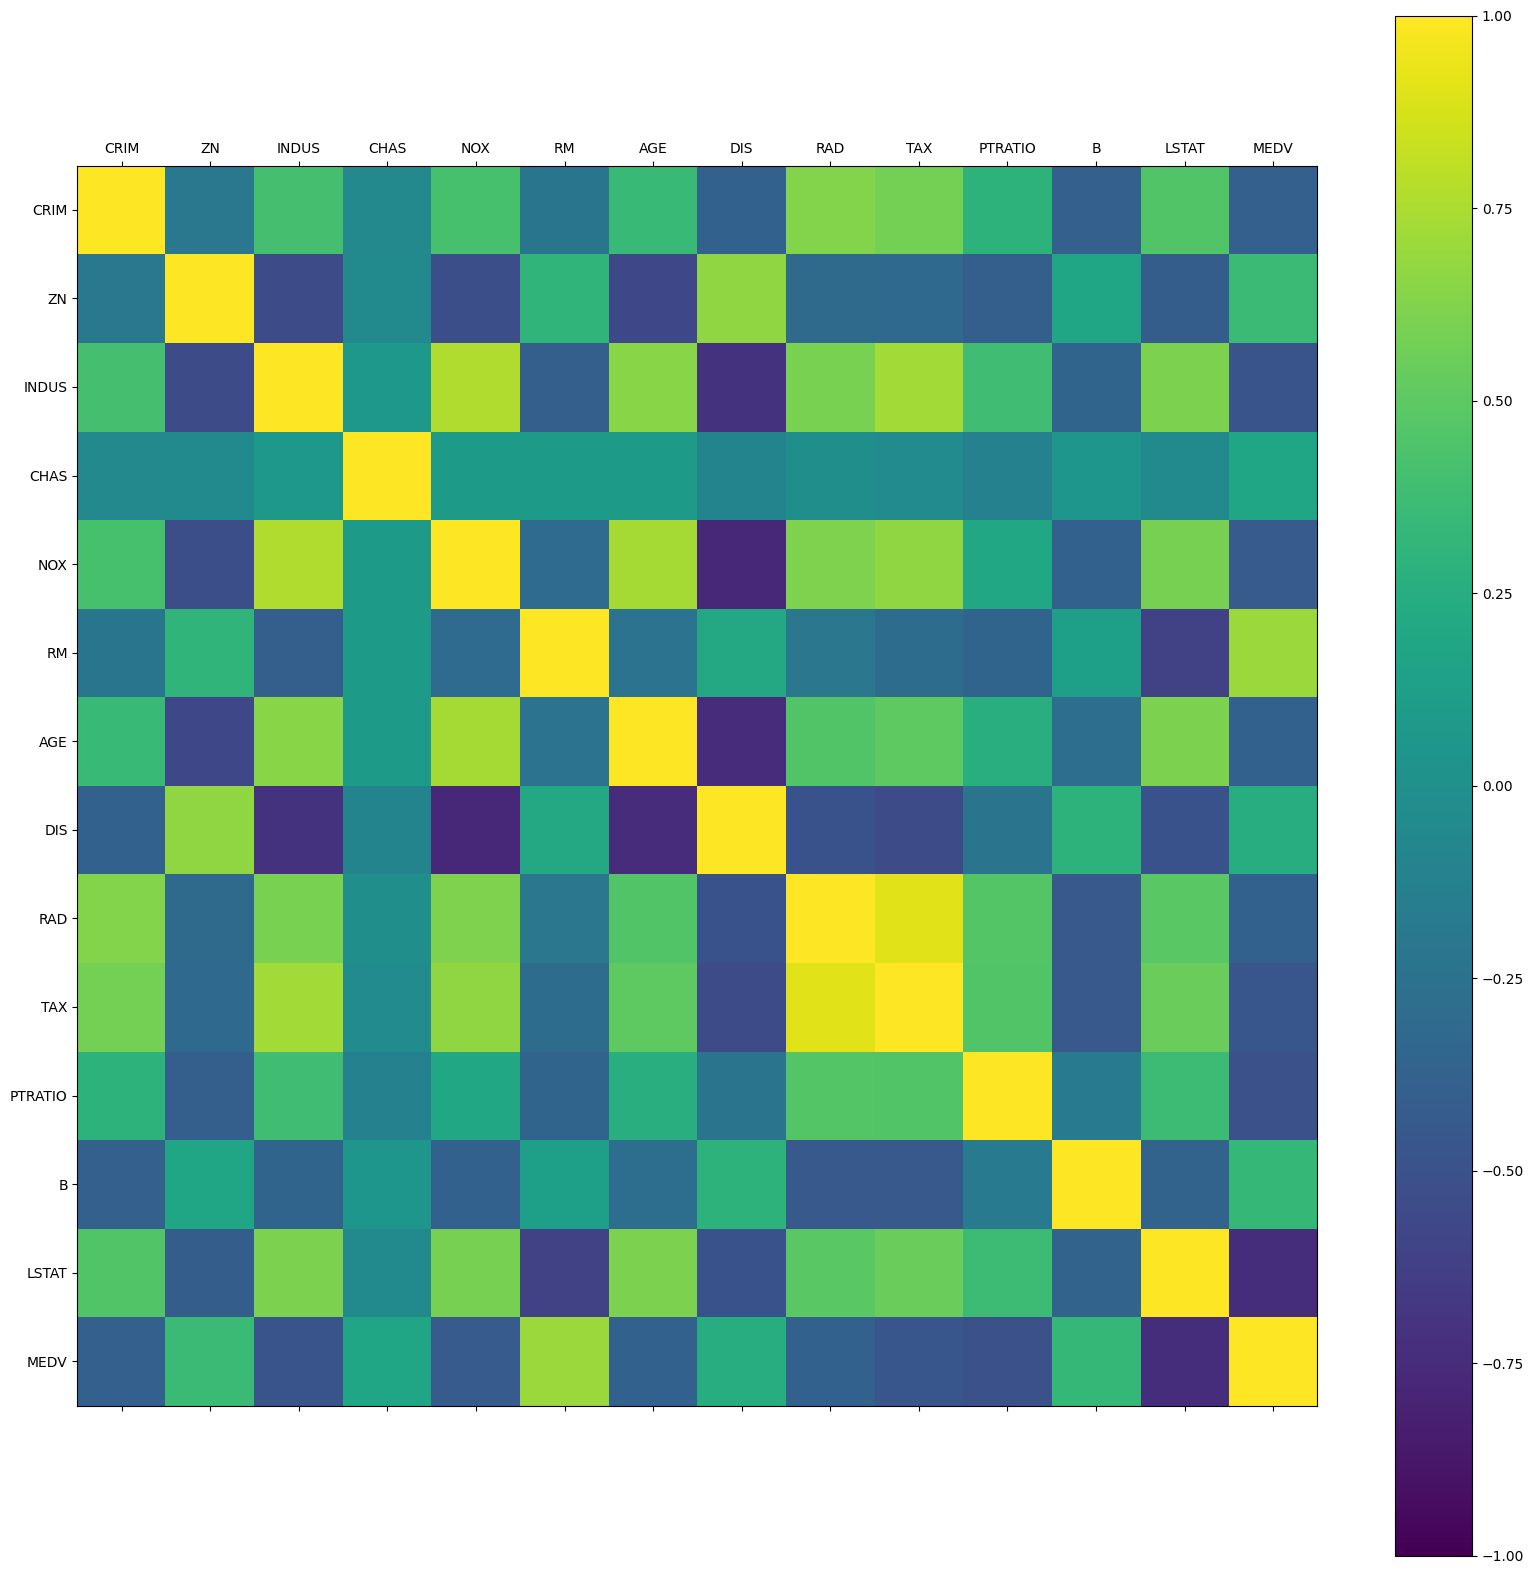

In [34]:
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111)
cax = ax.matshow(df.corr(), vmin=-1, vmax=1, interpolation='none')
fig.colorbar(cax)
ticks = np.arange(0,14,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(col_names)
ax.set_yticklabels(col_names)
plt.show()

In [53]:
array = df.values
X = array[:,0:df.shape[1]-1]
Y = array[:,df.shape[1]-1]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X,Y, test_size=validation_size, random_state=seed)

In [54]:
num_folds = 10
seed = 7
scoring = 'neg_mean_squared_error'

***Linear Algorithms:*** Linear Regression (LR), Lasso Regressio(LASSO) and ElasticNet(EN).


***Nonlinear Algorithms:*** Classification and Regression Trees (CART), Support Vector Regression (SVR) and k-Nearest Neighbors (KNN).


In [55]:
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('EN',ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART',DecisionTreeRegressor()))
models.append(('SVR',SVR()))

In [57]:
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print(f'{name}:({cv_results.mean()},{cv_results.std()})')

LR:(-21.379855726678663,9.414263656984714)
LASSO:(-26.42356110840965,11.651109915777916)
EN:(-27.50225935066171,12.305022264112706)
KNN:(-41.89648839024391,13.901688149849864)
CART:(-26.26296280487805,13.346196171942031)
SVR:(-67.8278859731828,29.049137595262604)


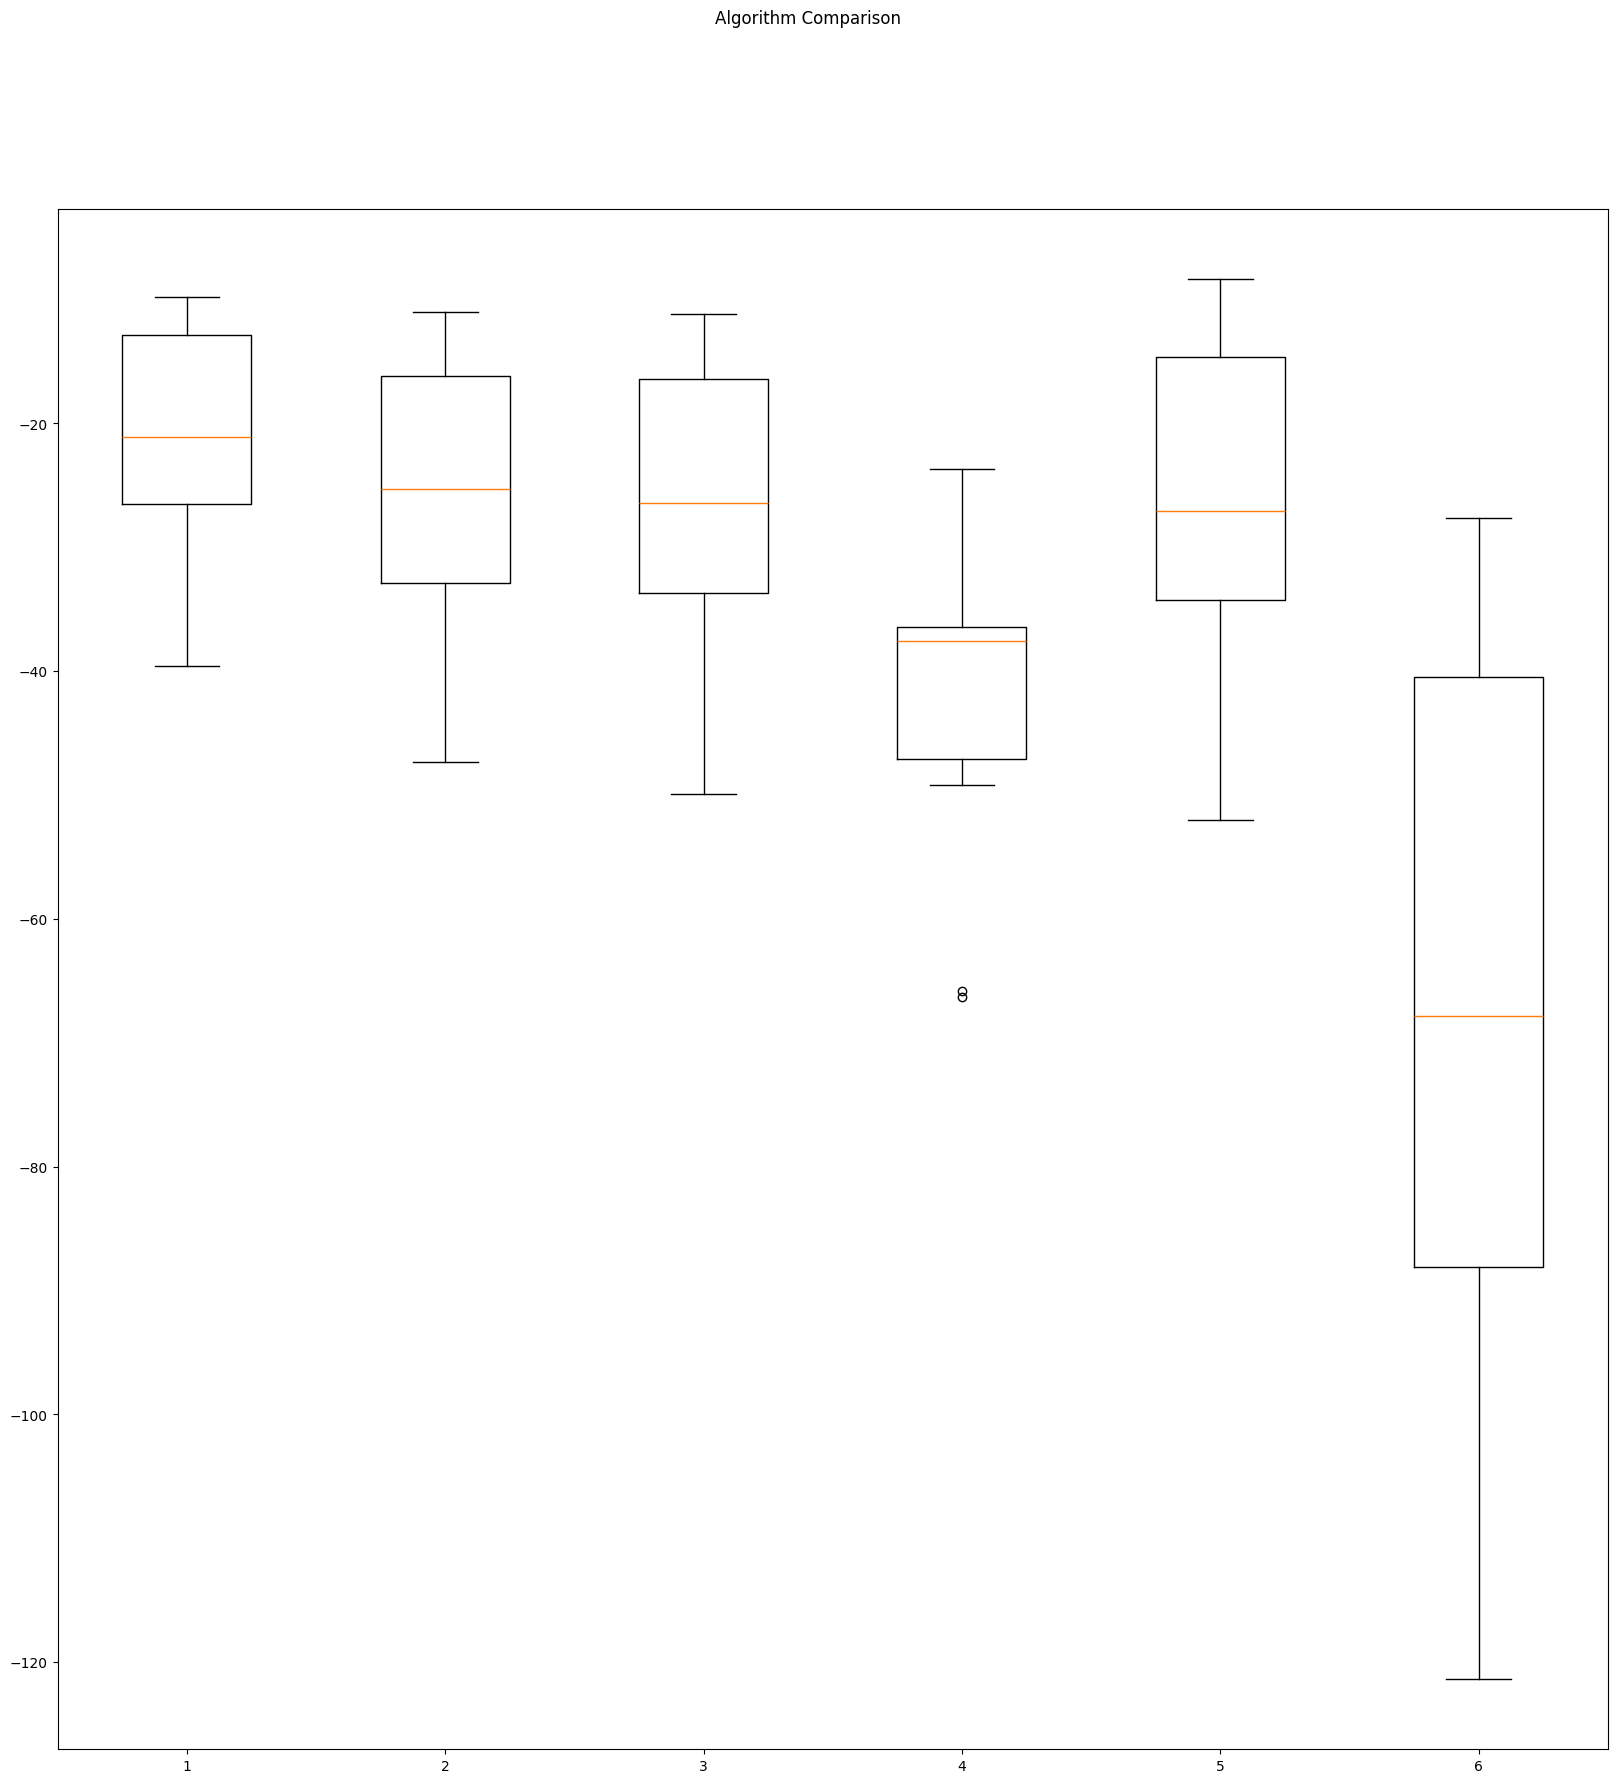

In [59]:
fig = plt.figure(figsize=(20,20))
fig.suptitle('Algorithm Comparison')
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [61]:
# Standardize the dataset
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR',
LinearRegression())])))
pipelines.append(('ScaledLASSO', Pipeline([('Scaler', StandardScaler()),('LASSO',
Lasso())])))
pipelines.append(('ScaledEN', Pipeline([('Scaler', StandardScaler()),('EN',
ElasticNet())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN',
KNeighborsRegressor())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART',
DecisionTreeRegressor())])))
pipelines.append(('ScaledSVR', Pipeline([('Scaler', StandardScaler()),('SVR', SVR())])))
results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=num_folds)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledLR: -21.379856 (9.414264)
ScaledLASSO: -26.607314 (8.978761)
ScaledEN: -27.932372 (10.587490)
ScaledKNN: -20.107620 (12.376949)
ScaledCART: -23.873179 (12.141728)
ScaledSVR: -29.633086 (17.009186)


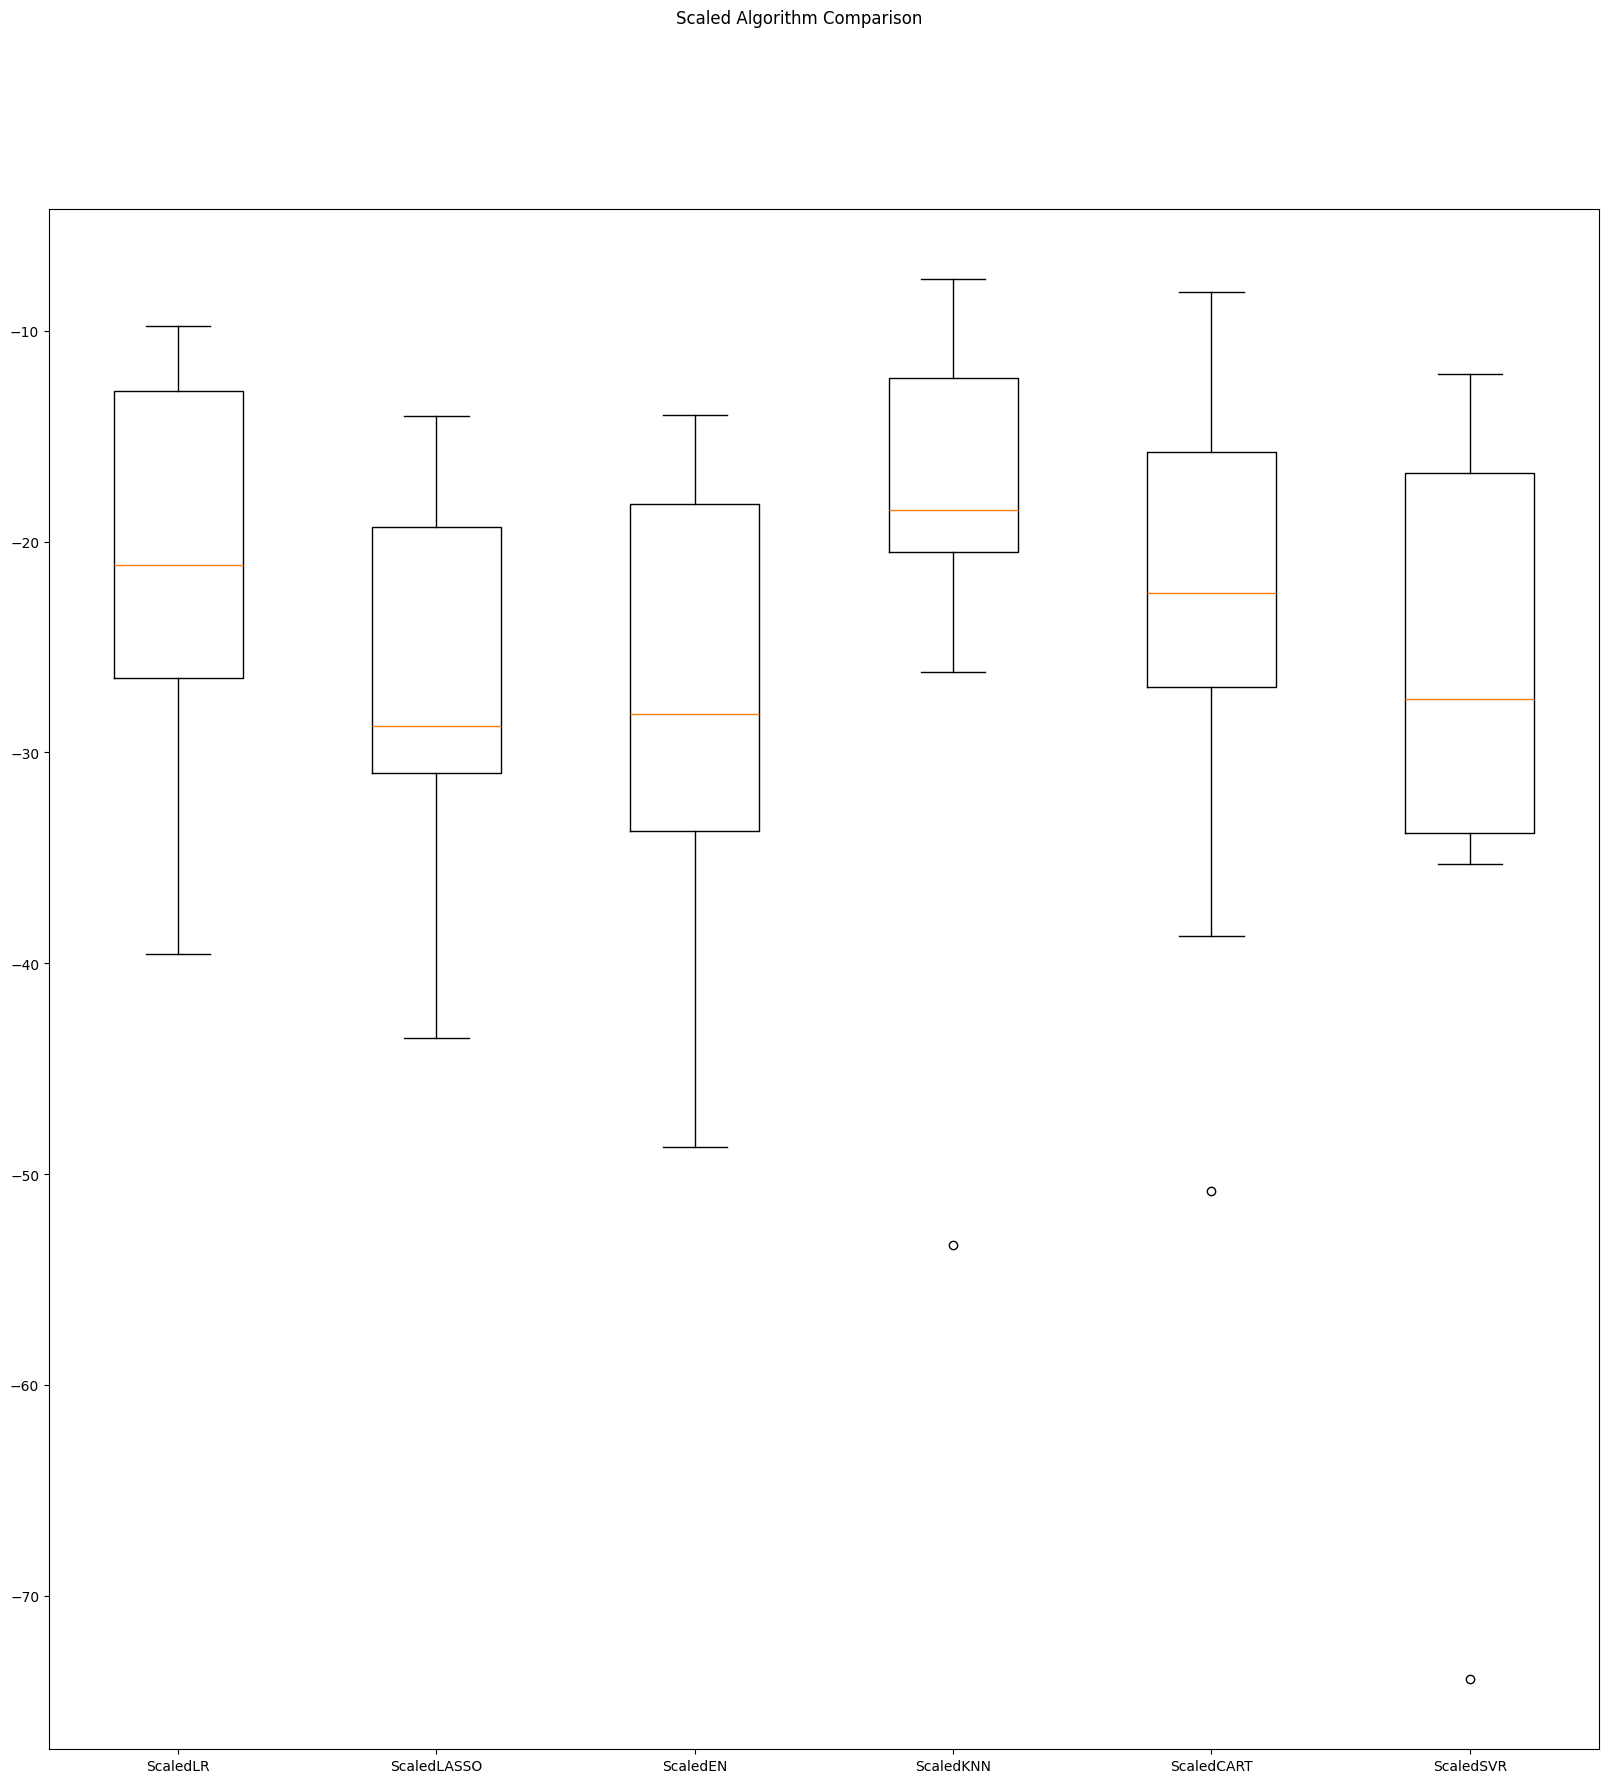

In [62]:
fig = plt.figure(figsize=(20,20))
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()


In [71]:
# KNN Algorithm Tuning
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
k_values =  np.array(np.arange(1,23,2))
param_grid = dict(n_neighbors = k_values)
model = KNeighborsRegressor()
kfold =  KFold(n_splits=num_folds)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX,Y_train)

In [78]:
print(f'Best: {grid_result.best_score_,grid_result.best_params_}')
means = grid_result.cv_results_['mean_test_score']
stds = grid.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean,stdev, param in zip(means,stds,params):
    print(f'{mean:.2f} ({stdev:.2f}) with {param}')

Best: (-18.10930386178861, {'n_neighbors': 3})
-20.17 (14.99) with {'n_neighbors': 1}
-18.11 (12.88) with {'n_neighbors': 3}
-20.06 (12.14) with {'n_neighbors': 5}
-20.51 (12.28) with {'n_neighbors': 7}
-20.32 (11.55) with {'n_neighbors': 9}
-20.96 (11.54) with {'n_neighbors': 11}
-21.10 (11.87) with {'n_neighbors': 13}
-21.51 (11.47) with {'n_neighbors': 15}
-22.74 (11.50) with {'n_neighbors': 17}
-23.83 (11.28) with {'n_neighbors': 19}
-24.32 (11.85) with {'n_neighbors': 21}


***Boosting Methods:*** AdaBoost (AB) and Gradient Boosting (GBM).


***Bagging Methods:*** Random Forests (RF) and Extra Trees (ET)

In [80]:
ensembles = []

ensembles.append(("ScaledAB", Pipeline([('Scaler', StandardScaler()),('AB',AdaBoostRegressor())])))
ensembles.append(("ScaledGBM", Pipeline([('Scaler', StandardScaler()),('AB',GradientBoostingRegressor())])))
ensembles.append(("ScaledRF", Pipeline([('Scaler', StandardScaler()),('AB',RandomForestRegressor())])))
ensembles.append(("ScaledET", Pipeline([('Scaler', StandardScaler()),('AB',ExtraTreesRegressor())])))
results = []
names = []
for name, model in ensembles:
    kfold = KFold(n_splits=num_folds)
    cv_results = cross_val_score(model,X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print(f'{name}: {cv_results.mean()}({cv_results.std()})')


ScaledAB: -15.561108097822853(6.6133596104371515)
ScaledGBM: -10.185253036668767(4.590483864699632)
ScaledRF: -11.645336995182925(6.18002545680504)
ScaledET: -9.084135316951212(5.180167364250566)


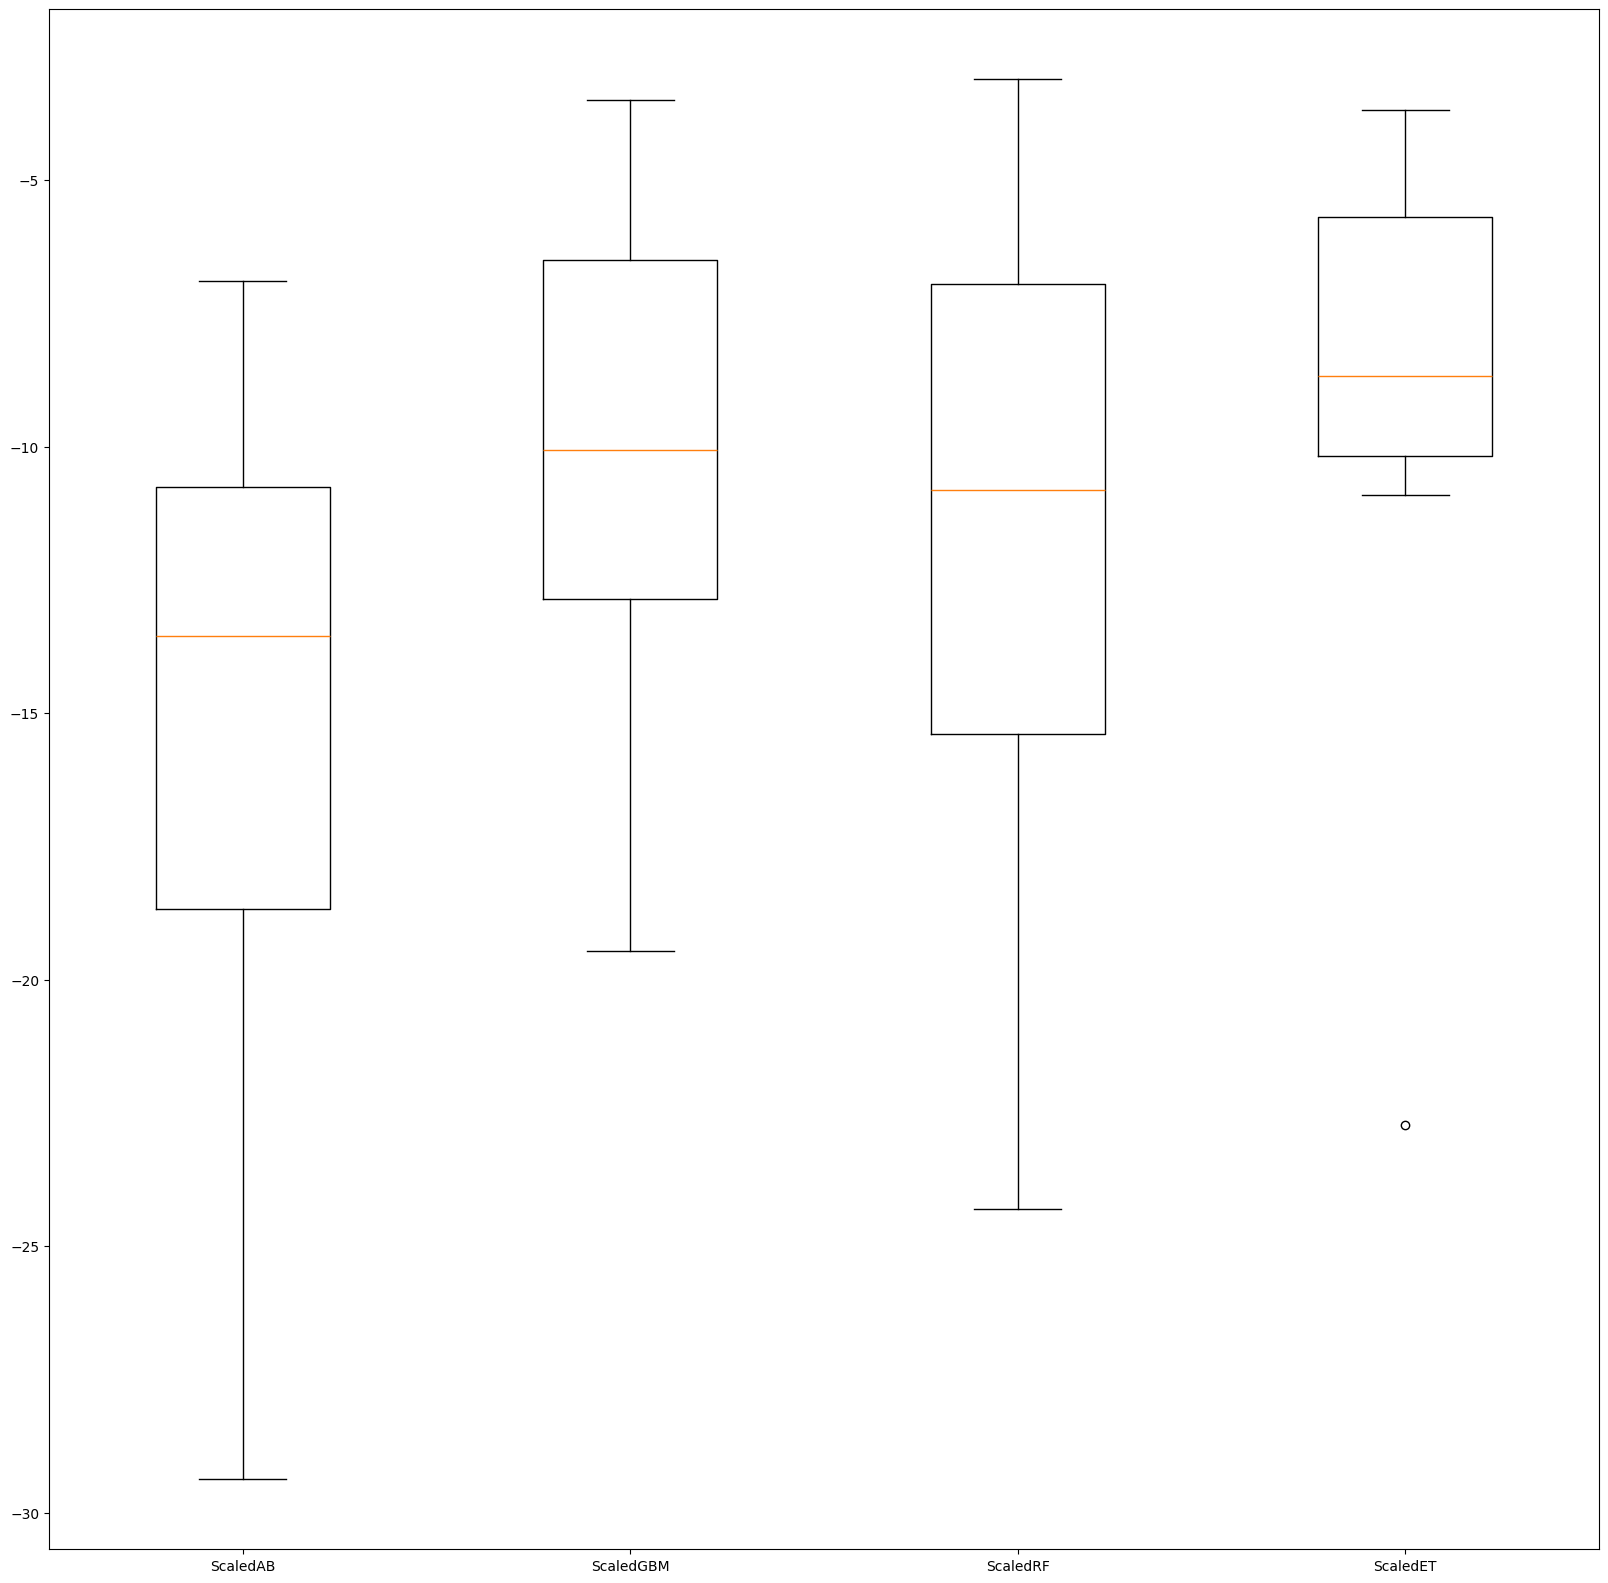

In [82]:
plt.figure(figsize=(20,20))
plt.boxplot(results, labels=names)
plt.show()

In [83]:
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
param_grid = dict(n_estimators = np.array(np.arange(50,450,50)))
model = GradientBoostingRegressor(random_state=seed)
kfold = KFold(n_splits=num_folds)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result=grid.fit(rescaledX, Y_train)

In [84]:
print(f'Best: {grid_result.best_score_},{grid_result.best_params_}')
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params =  grid_result.cv_results_['params']
for mean,std,param in zip(means,stds, params):
    print(f'{mean}({std}) with {param}')

Best: -9.379670170496617,{'n_estimators': 400}
-10.81317898995185(4.856737689847266) with {'n_estimators': 50}
-10.05737463176326(4.566985660906948) with {'n_estimators': 100}
-9.718097089502923(4.404729796863916) with {'n_estimators': 150}
-9.565306137539435(4.394354546704491) with {'n_estimators': 200}
-9.47700689962922(4.376432585897791) with {'n_estimators': 250}
-9.453795037052945(4.385228261973382) with {'n_estimators': 300}
-9.394901329520659(4.367860388994963) with {'n_estimators': 350}
-9.379670170496617(4.3820007612639555) with {'n_estimators': 400}


In [85]:
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
param_grid = dict(n_estimators = np.array(np.arange(50,450,50)))
model = ExtraTreesRegressor(random_state=seed)
kfold = KFold(n_splits=num_folds)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result=grid.fit(rescaledX, Y_train)

In [86]:
print(f'Best: {grid_result.best_score_},{grid_result.best_params_}')
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params =  grid_result.cv_results_['params']
for mean,std,param in zip(means,stds, params):
    print(f'{mean}({std}) with {param}')

Best: -8.922721820533537,{'n_estimators': 200}
-9.648023453902441(5.649403872319359) with {'n_estimators': 50}
-9.195532862317066(5.379206230998936) with {'n_estimators': 100}
-9.036910252168013(5.37633235692161) with {'n_estimators': 150}
-8.922721820533537(5.354997864722995) with {'n_estimators': 200}
-8.972300037395133(5.351834277199225) with {'n_estimators': 250}
-8.997065948631452(5.353870882504169) with {'n_estimators': 300}
-9.01622187855154(5.380031148207166) with {'n_estimators': 350}
-8.990830514527469(5.306985604985246) with {'n_estimators': 400}


In [88]:
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = GradientBoostingRegressor(random_state=seed, n_estimators=400)
model.fit(rescaledX, Y_train)
rescaledValidationX = scaler.transform(X_validation)
prediction = model.predict(rescaledValidationX)
print(mean_squared_error(Y_validation, prediction))

11.902132586880027


In [90]:
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = ExtraTreesRegressor(random_state=seed, n_estimators=200)
model.fit(rescaledX, Y_train)
rescaledValidationX = scaler.transform(X_validation)
prediction = model.predict(rescaledValidationX)
print(mean_squared_error(Y_validation, prediction))

13.36605184558824
